<a href="https://colab.research.google.com/github/Onturk89/MachineLearningFinal/blob/main/MakineOgrenmesiFinalOdevi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MAKİNE ÖĞRENMESİ FİNAL ÖDEV **



# DATANIN HAZIRLANMASI

Kullanılacak kütüphaneler import edilir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay , roc_curve
from sklearn import metrics
from matplotlib.pyplot import subplots
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#confusion_matrix net ifade alınamadığı için fonksiyon oluşturalım

def displayConfusionMatrix(y_true, y_pred):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels= [0,1],
        cmap=plt.cm.Blues
    )

In [ ]:
pima_indian_diabetes = pd.read_csv('/content/drive/MyDrive/MakineOgrenmesiFinal/Data/veri-seti.txt', sep="\t", header=None)
pima_indian_diabetes.columns = ["Number of times pregnant", "Plasma glucose concentration a 2 hours in an oral glucose tolerance test", "Diastolic blood pressure (mm Hg)", "Triceps skinfold thickness", "2-Hour serum insulin" ,"Body mass index", "Diabetes pedigree function", "Age", "ClassVariable" ]

In [ ]:
pima_indian_diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,ClassVariable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima_indian_diabetes.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness                                                  0
2-Hour serum insulin                                                        0
Body mass index                                                             0
Diabetes pedigree function                                                  0
Age                                                                         0
ClassVariable                                                               0
dtype: int64

In [ ]:
pima_indian_diabetes.isna().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness                                                  0
2-Hour serum insulin                                                        0
Body mass index                                                             0
Diabetes pedigree function                                                  0
Age                                                                         0
ClassVariable                                                               0
dtype: int64

Etiketsiz olan ClassVariable değerleri kaldırılır

In [ ]:
pima_indian_diabetes.dropna(subset=["ClassVariable"], inplace=True)
pima_indian_diabetes.isna().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness                                                  0
2-Hour serum insulin                                                        0
Body mass index                                                             0
Diabetes pedigree function                                                  0
Age                                                                         0
ClassVariable                                                               0
dtype: int64

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    500
1    268
Name: count, dtype: int64

Sınıflandırma dengeli değildir

****1.	Soru****

Ayrık değerler çıkartılır

In [ ]:
ClassVariable = pima_indian_diabetes.ClassVariable

Number of times pregnant için ayrık değerler çıkartılır

In [ ]:
pima_indian_diabetes.ClassVariable = pd.Series(pima_indian_diabetes.ClassVariable , dtype='category')
pima_indian_diabetes.ClassVariable.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

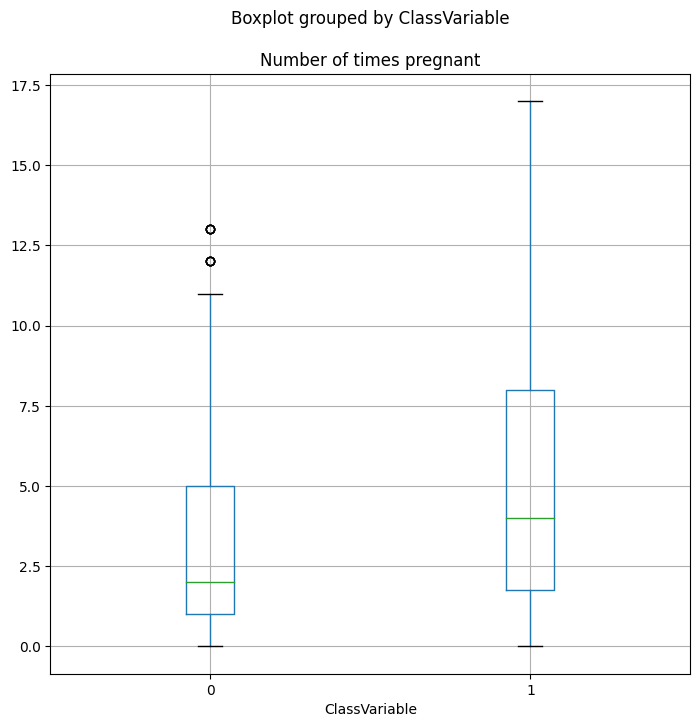

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('Number of times pregnant', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0].loc[(pima_indian_diabetes["Number of times pregnant"] < 11 ) & (pima_indian_diabetes["Number of times pregnant"] >= 0)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    486
1    268
Name: count, dtype: int64

Plasma glucose concentration a 2 hours in an oral glucose tolerance test için ayrık değerler kaldırılacak

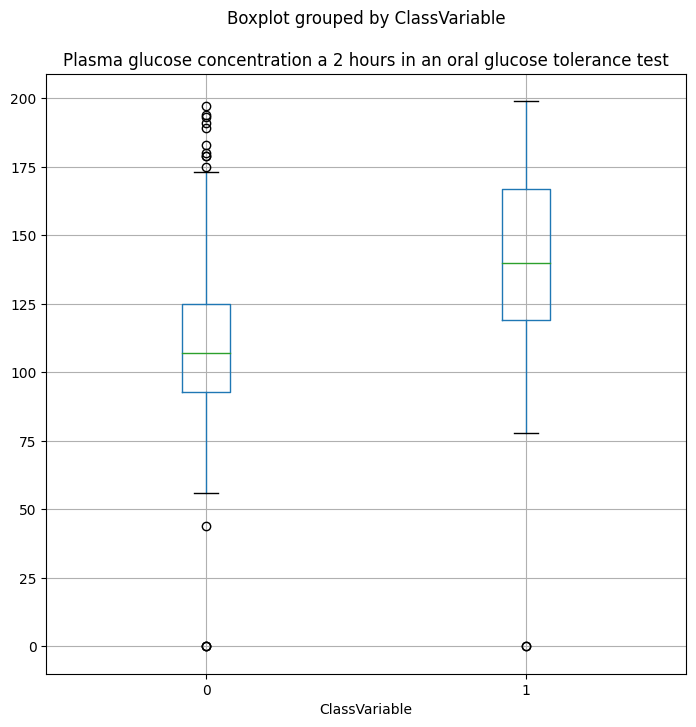

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('Plasma glucose concentration a 2 hours in an oral glucose tolerance test', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0].loc[(pima_indian_diabetes["Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] < 175 ) & (pima_indian_diabetes["Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] >= 50)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    472
1    268
Name: count, dtype: int64

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1].loc[(pima_indian_diabetes["Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] < 200 ) & (pima_indian_diabetes["Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] >= 75)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    472
1    266
Name: count, dtype: int64

Diastolic blood pressure (mm Hg) için ayrık değerler çıkartılır

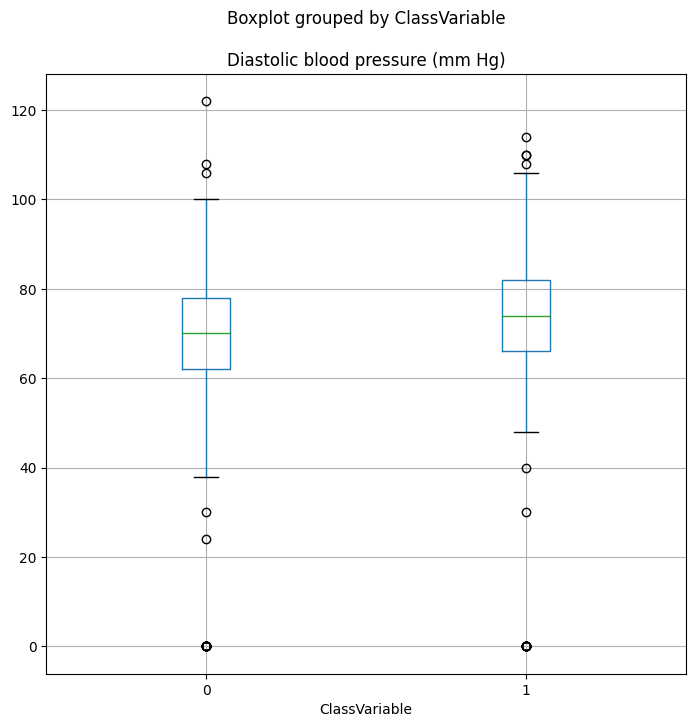

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('Diastolic blood pressure (mm Hg)', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0].loc[(pima_indian_diabetes["Diastolic blood pressure (mm Hg)"] < 101 ) & (pima_indian_diabetes["Diastolic blood pressure (mm Hg)"] >= 40)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    447
1    266
Name: count, dtype: int64

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1].loc[(pima_indian_diabetes["Diastolic blood pressure (mm Hg)"] < 110 ) & (pima_indian_diabetes["Diastolic blood pressure (mm Hg)"] > 40)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    447
1    245
Name: count, dtype: int64

Triceps skinfold thickness için ayrık değerler çıkartılır

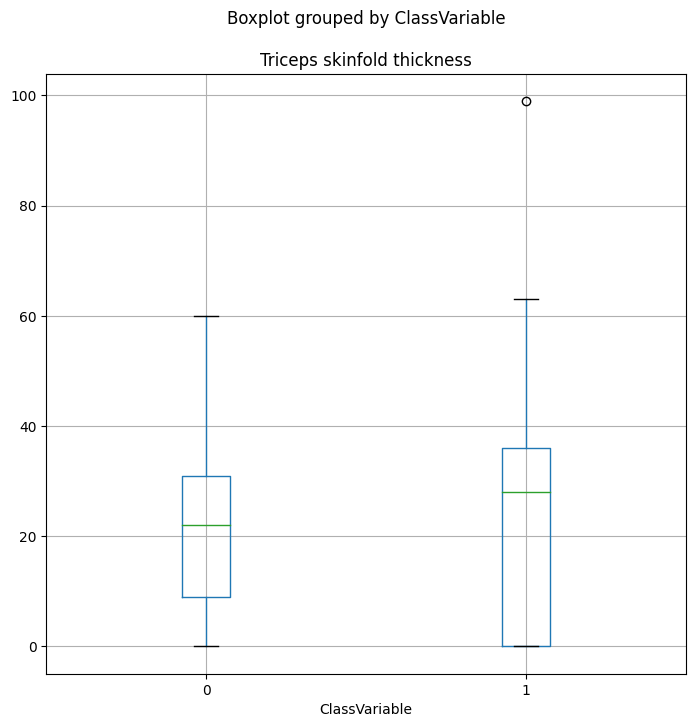

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('Triceps skinfold thickness', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1].loc[(pima_indian_diabetes["Triceps skinfold thickness"] < 65 ) & (pima_indian_diabetes["Triceps skinfold thickness"] >= 0)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    447
1    244
Name: count, dtype: int64

2-Hour serum insulin ayrık değerler çıkartılır

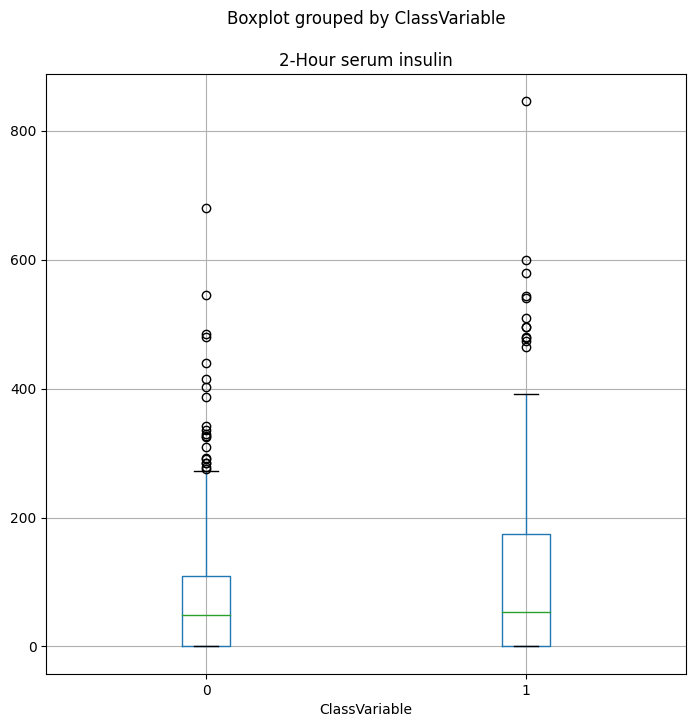

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('2-Hour serum insulin', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0].loc[(pima_indian_diabetes["2-Hour serum insulin"] < 250 ) & (pima_indian_diabetes["2-Hour serum insulin"] >= 0)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    422
1    244
Name: count, dtype: int64

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1].loc[(pima_indian_diabetes["2-Hour serum insulin"] < 400 ) & (pima_indian_diabetes["2-Hour serum insulin"] >= 0)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    422
1    232
Name: count, dtype: int64

Body mass index için ayrık değerler çıkartılır

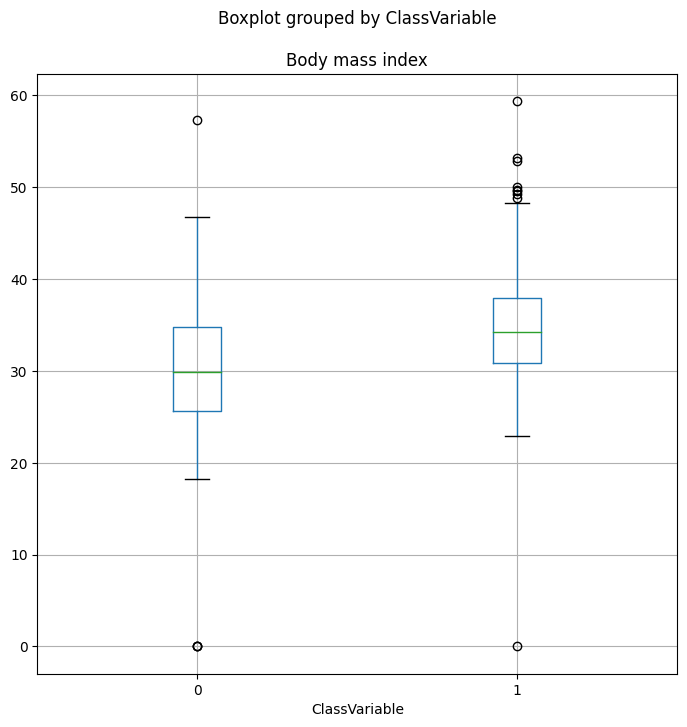

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('Body mass index', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1].loc[(pima_indian_diabetes["Body mass index"] < 48 ) & (pima_indian_diabetes["Body mass index"] > 20)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    422
1    222
Name: count, dtype: int64

Diabetes pedigree function ayrık değerler çıkartılır

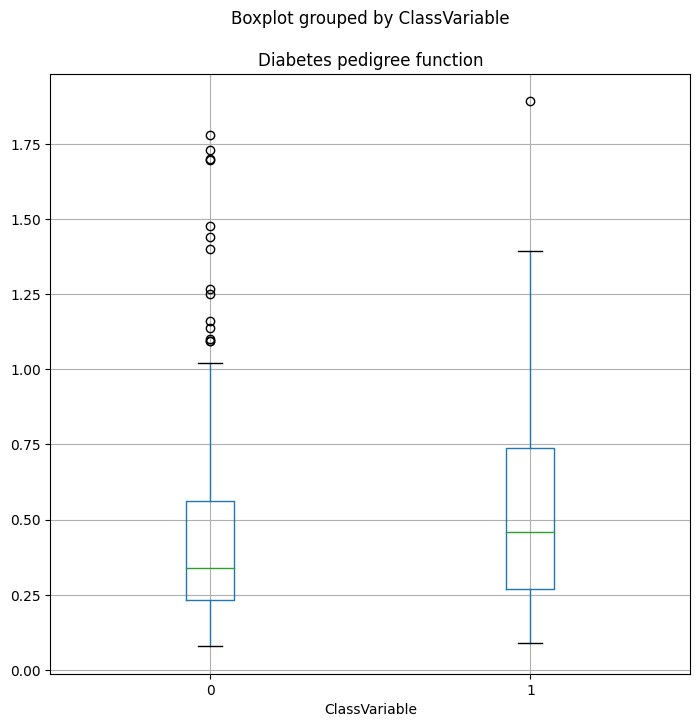

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('Diabetes pedigree function', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0].loc[(pima_indian_diabetes["Diabetes pedigree function"] < 1.05 ) & (pima_indian_diabetes["Diabetes pedigree function"] > 0)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    408
1    222
Name: count, dtype: int64

In [ ]:
ClassVariable = pima_indian_diabetes.ClassVariable

In [ ]:
feature_pima_indian_diabetes = pima_indian_diabetes.drop(columns=['ClassVariable'], axis = 1)

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
Algoritmasını kullanan MinMaxScaler uygulanır. Her bir niteliği 0 ve 1 arasında sıralar

In [ ]:
scaler = MinMaxScaler()
pima_indian_diabetes_norm = scaler.fit_transform( feature_pima_indian_diabetes)

Normalizasyondan sonra numpy array olan öznitelikler tekrar DataFrame'e çevrilir

In [ ]:
feature_pima_indian_diabetes_norm = pd.DataFrame(
                                                 pima_indian_diabetes_norm,
                                                 columns=feature_pima_indian_diabetes.columns
)

In [ ]:
feature_pima_indian_diabetes_norm.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,0.352941,0.643357,0.451613,0.583333,0.000000,0.586387,0.302479,0.483333
1,0.058824,0.202797,0.354839,0.483333,0.000000,0.464223,0.150413,0.166667
2,0.470588,0.888112,0.322581,0.000000,0.000000,0.406632,0.327273,0.183333
3,0.058824,0.230769,0.354839,0.383333,0.239796,0.490401,0.049036,0.000000
4,0.294118,0.419580,0.483871,0.000000,0.000000,0.446771,0.067769,0.150000


In [ ]:
feature_pima_indian_diabetes_norm.isna().sum()

Number of times pregnant                                                    138
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    138
Diastolic blood pressure (mm Hg)                                            138
Triceps skinfold thickness                                                  138
2-Hour serum insulin                                                        138
Body mass index                                                             138
Diabetes pedigree function                                                  138
Age                                                                         138
dtype: int64

Etiketsiz kalanlar silinir

In [ ]:
feature_pima_indian_diabetes_norm.dropna(subset=["Age"], inplace=True)
feature_pima_indian_diabetes_norm.isna().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness                                                  0
2-Hour serum insulin                                                        0
Body mass index                                                             0
Diabetes pedigree function                                                  0
Age                                                                         0
dtype: int64

In [ ]:
ClassVariable.isna().sum()

138

In [ ]:
ClassVariable.dropna(inplace=True)

In [ ]:
ClassVariable.isna().sum()

0

2. Soru

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
Pima_indian_diabetes_train, Pima_indian_diabetes_test, CV_train, CV_test = train_test_split(feature_pima_indian_diabetes_norm, ClassVariable, test_size = 0.3, random_state = 42)

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(Pima_indian_diabetes_train,CV_train)

GaussianNB()

In [ ]:
expected = CV_train

In [ ]:
predicted = model.predict(Pima_indian_diabetes_train)

In [ ]:
print(classification_report(expected,predicted ))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       287
           1       0.75      0.70      0.72       154

    accuracy                           0.81       441
   macro avg       0.80      0.79      0.79       441
weighted avg       0.81      0.81      0.81       441



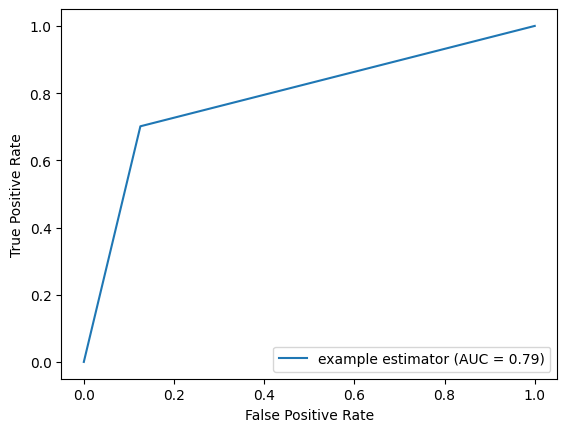

In [ ]:
#Roc curve oluşturup threshold hakkında bilgi sahibi olalım
fpr, tpr, thresholds = roc_curve(CV_train , predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

QuantileTransformer yöntemi, özellikleri tekdüze veya normal bir dağılım izleyecek şekilde dönüştürür. Bu nedenle, belirli bir özellik için bu dönüşüm en sık görülen değerleri yayma eğilimindedir. Aynı zamanda (marjinal) aykırı değerlerin etkisini de azaltır: bu nedenle bu sağlam bir ön işleme şemasıdır.

Bu yöntem pipeline'da Naive Bayes ile birlşetirilir

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import QuantileTransformer

In [ ]:
pipeline = make_pipeline(QuantileTransformer(output_distribution='normal',  n_quantiles=200), GaussianNB())
pipeline.fit(Pima_indian_diabetes_train,CV_train)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(n_quantiles=200,
                                     output_distribution='normal')),
                ('gaussiannb', GaussianNB())])

In [ ]:
cross_val_score(pipeline, Pima_indian_diabetes_train,CV_train, scoring='roc_auc', cv=7).mean()

0.8675958188153309

In [ ]:
predicted_pipeline = pipeline.predict(Pima_indian_diabetes_train)

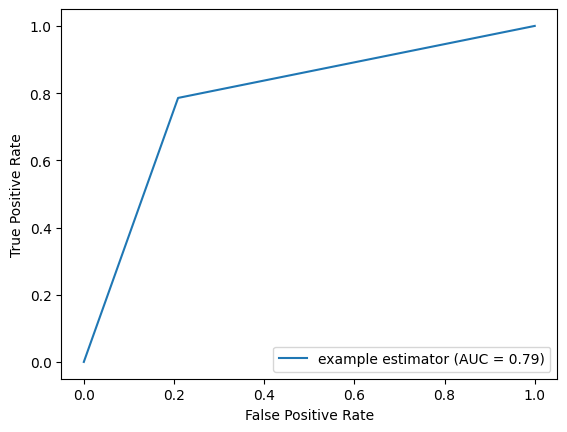

In [ ]:
#Roc curve oluşturup threshold hakkında bilgi sahibi olalım
fpr, tpr, thresholds = roc_curve(CV_train , predicted_pipeline)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [ ]:
print(classification_report(expected,predicted_pipeline))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       287
           1       0.67      0.79      0.72       154

    accuracy                           0.79       441
   macro avg       0.77      0.79      0.78       441
weighted avg       0.80      0.79      0.79       441



1. yöntem daha başarılıdır

3. Soru

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Pima_indian_diabetes_train,CV_train)
    pred_i = knn.predict(Pima_indian_diabetes_test)
    error.append(np.mean(pred_i != CV_test))

Text(0, 0.5, 'Mean Error')

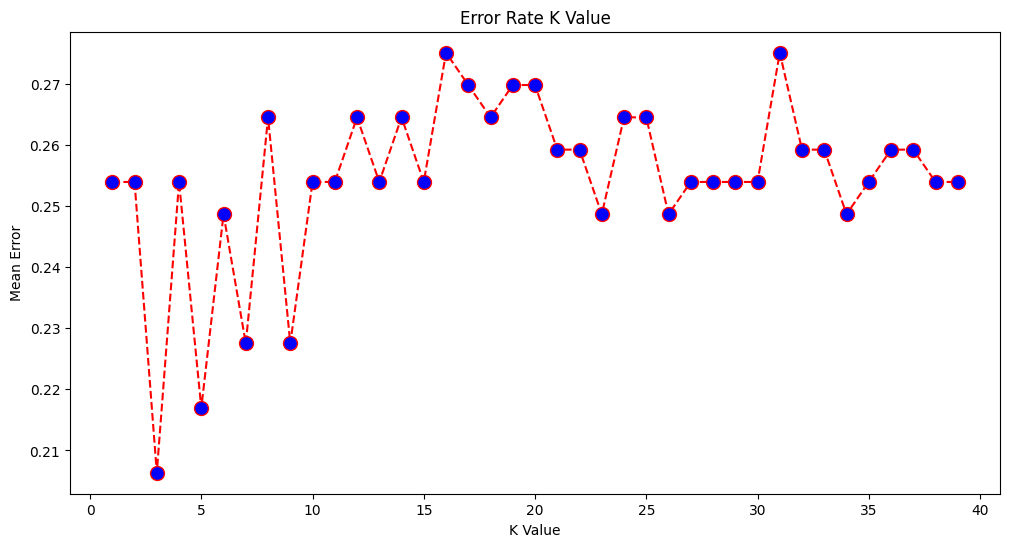

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
K = 4

In [ ]:
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(Pima_indian_diabetes_train,CV_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
predicted_knn = knn.predict(Pima_indian_diabetes_train)

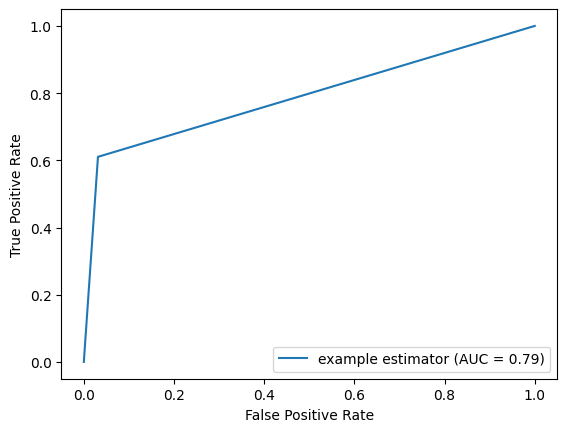

In [ ]:
#Roc curve oluşturup threshold hakkında bilgi sahibi olalım
fpr, tpr, thresholds = roc_curve(CV_train , predicted_knn)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [ ]:
print(classification_report(expected,predicted_knn ))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       287
           1       0.91      0.61      0.73       154

    accuracy                           0.84       441
   macro avg       0.87      0.79      0.81       441
weighted avg       0.85      0.84      0.83       441



In [ ]:
dataset = pima_indian_diabetes.values.tolist()

In [ ]:
# k-nearest neighbors
from random import seed
from random import randrange
from csv import reader
from math import sqrt


# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column])

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = classification_report(actual,predicted, output_dict=True )["accuracy"]
		scores.append(accuracy)
	return scores

# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
	predictions = list()
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predictions.append(output)
	return(predictions)

# Test the kNN on the Iris Flowers dataset
seed(42)
dataset = dataset
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5

In [ ]:
for i in range(1, 10):
  num_neighbors = i
  scores = evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors)
  mean_score = np.mean(scores)
  print(f"{i} komşuluk accuracy skoru= {mean_score}")

1 komşuluk accuracy skoru= 0.711111111111111
2 komşuluk accuracy skoru= 0.7285714285714285
3 komşuluk accuracy skoru= 0.7285714285714286
4 komşuluk accuracy skoru= 0.7380952380952381
5 komşuluk accuracy skoru= 0.7492063492063492
6 komşuluk accuracy skoru= 0.7492063492063492
7 komşuluk accuracy skoru= 0.753968253968254
8 komşuluk accuracy skoru= 0.7507936507936508
9 komşuluk accuracy skoru= 0.7492063492063492


KNeighborsClassifier algoritmasında 4 komşuluk kullanılmasıyla elde edilen sonucun, k_nearest_neighbors isimli cross-fold yöntemiyle oluşturulan algoritmadan daha başarılı sonuç döndüğü görülmüştür

4. Soru

In [ ]:
import tensorflow as tf

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
history = model1.fit(Pima_indian_diabetes_train, CV_train, epochs=10)

Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 0.6276 - accuracy: 0.6689
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7619
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7596
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7846
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8163
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8005
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7846
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8141
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8027
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7891


In [ ]:
model1_pred = model1.predict(Pima_indian_diabetes_train)

14/14 [==============================] - 0s 2ms/step


In [ ]:
tf.round(model1_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
CV_train

700    0
114    1
642    1
148    0
517    0
      ..
94     0
134    0
326    1
531    0
130    1
Name: ClassVariable, Length: 441, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
model1_accuracy = accuracy_score(CV_train, tf.round(model1_pred)) * 100
model1_accuracy

80.27210884353741

In [ ]:
model1_results =  {"1h": 128,
                   "2h": 64,
                   "3h": 32,
                   "aktivasyon_fonksiyonu": "relu",
                   "learning_rate": 0.01,
                   "accuracy": model1_accuracy}

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

# Fit the model
model2.fit(Pima_indian_diabetes_train, CV_train, epochs=10)

Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 0.6732 - accuracy: 0.6508
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6508
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6508
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6508
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6508
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6508
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6508
Epoch 8/10
14/14 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6508
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6508
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.6508


In [ ]:
model2_pred = model2.predict(Pima_indian_diabetes_train)

14/14 [==============================] - 0s 1ms/step


In [ ]:
model2_accuracy = accuracy_score(CV_train, tf.round(model2_pred)) * 100
model2_accuracy

65.07936507936508

In [ ]:
model2_results =  {"1h": 128,
                   "2h": 64,
                   "3h": 32,
                   "aktivasyon_fonksiyonu": "relu",
                   "learning_rate": 0.0001,
                   "accuracy": model2_accuracy}

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation=tf.keras.activations.linear),
  tf.keras.layers.Dense(64, activation=tf.keras.activations.linear),
  tf.keras.layers.Dense(32, activation=tf.keras.activations.linear),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
model3.fit(Pima_indian_diabetes_train, CV_train, epochs=10)

Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 0.7040 - accuracy: 0.5896
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7664
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7619
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.7868
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7937
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7755
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.7914
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8118
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7914
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8005


In [ ]:
model3_pred = model3.predict(Pima_indian_diabetes_train)

14/14 [==============================] - 0s 6ms/step


In [ ]:
model3_accuracy = accuracy_score(CV_train, tf.round(model3_pred)) * 100
model3_accuracy

82.53968253968253

In [ ]:
model3_results =  {"1h": 64,
                   "2h": 64,
                   "3h": 32,
                   "aktivasyon_fonksiyonu": "linear",
                   "learning_rate": 0.01,
                   "accuracy": model3_accuracy}

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(32, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(32, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
model4.fit(Pima_indian_diabetes_train, CV_train, epochs=10)

Epoch 1/10
14/14 [==============================] - 1s 4ms/step - loss: 0.6070 - accuracy: 0.6871
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7370
Epoch 3/10
14/14 [==============================] - 0s 4ms/step - loss: 0.4852 - accuracy: 0.7642
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.7823
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.7937
Epoch 6/10
14/14 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7528
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8005
Epoch 8/10
14/14 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.8095
Epoch 9/10
14/14 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7937
Epoch 10/10
14/14 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.7914


In [ ]:
model4_pred = model4.predict(Pima_indian_diabetes_train)

14/14 [==============================] - 0s 2ms/step


In [ ]:
model4_accuracy = accuracy_score(CV_train, tf.round(model4_pred)) * 100
model4_accuracy

82.99319727891157

In [ ]:
model4_results =  {"1h": 64,
                   "2h": 64,
                   "3h": 32,
                   "aktivasyon_fonksiyonu": "tanh",
                   "learning_rate": 0.01,
                   "accuracy": model4_accuracy}

In [ ]:
mlp_model_results = pd.DataFrame({"model1_results": model1_results,
                                  "model2_results": model2_results,
                                  "model3_results": model3_results,
                                  "model4_results": model4_results})
mlp_model_results = mlp_model_results.transpose()
mlp_model_results

,1h,2h,3h,aktivasyon_fonksiyonu,learning_rate,accuracy
model1_results,128,64,32,relu,0.01,80.272109
model2_results,128,64,32,relu,0.0001,65.079365
model3_results,64,64,32,linear,0.01,82.539683
model4_results,64,64,32,tanh,0.01,82.993197


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model1 = SVC(kernel = "linear").fit(Pima_indian_diabetes_train, CV_train)

In [ ]:
svm_model1_pred = svm_model1.predict(Pima_indian_diabetes_train)

In [ ]:
svm_model1_accuracy = accuracy_score(CV_train, svm_model1_pred) * 100
svm_model1_accuracy

82.08616780045351

In [ ]:
svm_model1_results =  {"kernel" : "linear",
                       "Regularization parameter":1,
                       "accuracy": svm_model1_accuracy}

In [ ]:
svm_model2 = SVC(C=5, kernel = "linear").fit(Pima_indian_diabetes_train, CV_train)

In [ ]:
svm_model2_pred = svm_model2.predict(Pima_indian_diabetes_train)

In [ ]:
svm_model2_accuracy = accuracy_score(CV_train, svm_model2_pred) * 100
svm_model2_accuracy

82.31292517006803

In [ ]:
svm_model2_results =  {"kernel" : "linear",
                       "Regularization parameter":5,
                       "accuracy": svm_model2_accuracy}

In [ ]:
svm_model3 = SVC(C=10, kernel = "poly").fit(Pima_indian_diabetes_train, CV_train)

In [ ]:
svm_model3_pred = svm_model3.predict(Pima_indian_diabetes_train)

In [ ]:
svm_model3_accuracy = accuracy_score(CV_train, svm_model3_pred) * 100
svm_model3_accuracy

87.3015873015873

In [ ]:
svm_model3_results =  {"kernel" : "poly",
                       "Regularization parameter":10,
                       "accuracy": svm_model3_accuracy}

In [ ]:
svm_model4 = SVC(C=5, kernel = "rbf").fit(Pima_indian_diabetes_train, CV_train)

In [ ]:
svm_model4_pred = svm_model4.predict(Pima_indian_diabetes_train)

In [ ]:
svm_model4_accuracy = accuracy_score(CV_train, svm_model4_pred) * 100
svm_model4_accuracy

88.66213151927438

In [ ]:
svm_model4_results =  {"kernel" : "rbf",
                       "Regularization parameter":5,
                       "accuracy": svm_model4_accuracy}

In [ ]:
svm_model_results = pd.DataFrame({"svm_model1_results": svm_model1_results,
                                  "svm_model2_results": svm_model2_results,
                                  "svm_model3_results": svm_model3_results,
                                  "svm_model4_results": svm_model4_results})
svm_model_results = svm_model_results.transpose()
svm_model_results

,kernel,Regularization parameter,accuracy
svm_model1_results,linear,1,82.086168
svm_model2_results,linear,5,82.312925
svm_model3_results,poly,10,87.301587
svm_model4_results,rbf,5,88.662132


kernel'i rbf olan 5 için regüle edilen svm modeli en başarılı modeldir

5. Soru

Optimizasyon işlemi için  RandomForrestRegressor ile daha az önemli sütunlar çıkarılacaktır

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
pima_indian_diabetes = pd.read_csv('/content/drive/MyDrive/MakineOgrenmesiFinal/Data/veri-seti.txt', sep="\t", header=None)
pima_indian_diabetes.columns = ["Number of times pregnant", "Plasma glucose concentration a 2 hours in an oral glucose tolerance test", "Diastolic blood pressure (mm Hg)", "Triceps skinfold thickness", "2-Hour serum insulin" ,"Body mass index", "Diabetes pedigree function", "Age", "ClassVariable" ]

In [ ]:
ClassVariable = pima_indian_diabetes.ClassVariable

In [ ]:
feature_pima_indian_diabetes = pima_indian_diabetes.drop(columns=['ClassVariable'], axis = 1)

In [ ]:
Pima_indian_diabetes_train, Pima_indian_diabetes_test, CV_train, CV_test = train_test_split(feature_pima_indian_diabetes, ClassVariable, test_size = 0.3, random_state = 42)

In [ ]:
# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt"],
           "max_samples": [400]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(Pima_indian_diabetes_train, CV_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [400],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'max_samples': 400,
 'max_features': 0.5,
 'max_depth': None}

In [ ]:
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=60,
                                    min_samples_leaf=2,
                                    min_samples_split=15,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_depth=None,
                                    max_samples=400,
                                    random_state=42)

# Fit the ideal model
ideal_model.fit(Pima_indian_diabetes_train, CV_train)

RandomForestRegressor(max_features=0.5, max_samples=400, min_samples_leaf=2,
                      min_samples_split=15, n_estimators=60, n_jobs=-1,
                      random_state=42)

In [ ]:
ideal_model.feature_importances_

array([0.04826589, 0.37452704, 0.05473781, 0.03672084, 0.05012145,
       0.18555129, 0.08228605, 0.16778962])

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

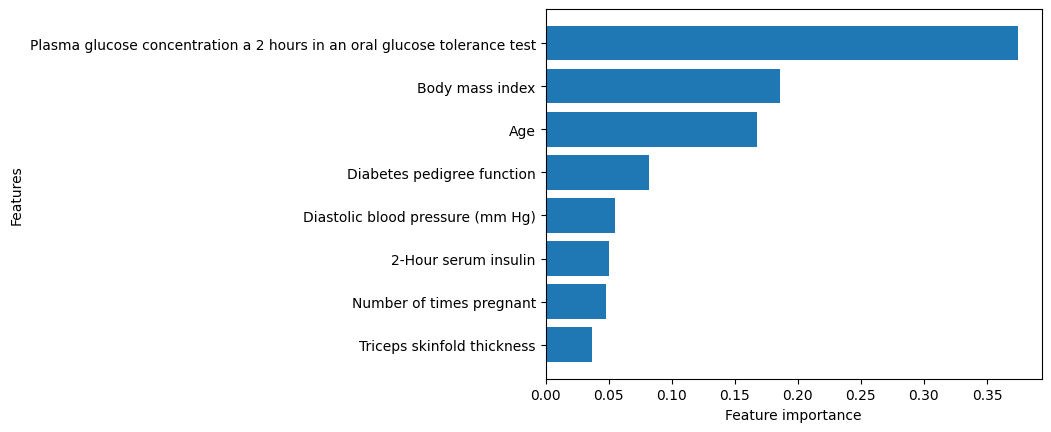

In [ ]:
plot_features(Pima_indian_diabetes_train.columns, ideal_model.feature_importances_)

Karar ağacına göre "Plasma glucose concentration a 2 hours in an oral glucose tolerance test" ,"Diabetes pedigree function" ,  vücut kitle indeksi ve yaş değerleri önemlidir. Bundan sonra model analizi bu değerler üzerinden yapılacaktır

In [ ]:
pima_indian_diabetes = pd.read_csv('/content/drive/MyDrive/MakineOgrenmesiFinal/Data/veri-seti.txt', sep="\t", header=None)
pima_indian_diabetes.columns = ["Number of times pregnant", "Plasma glucose concentration a 2 hours in an oral glucose tolerance test", "Diastolic blood pressure (mm Hg)", "Triceps skinfold thickness", "2-Hour serum insulin" ,"Body mass index", "Diabetes pedigree function", "Age", "ClassVariable" ]

In [ ]:
pima_indian_diabetes.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness                                                  0
2-Hour serum insulin                                                        0
Body mass index                                                             0
Diabetes pedigree function                                                  0
Age                                                                         0
ClassVariable                                                               0
dtype: int64

In [ ]:
pima_indian_diabetes.isna().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness                                                  0
2-Hour serum insulin                                                        0
Body mass index                                                             0
Diabetes pedigree function                                                  0
Age                                                                         0
ClassVariable                                                               0
dtype: int64

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0    500
1    268
Name: count, dtype: int64

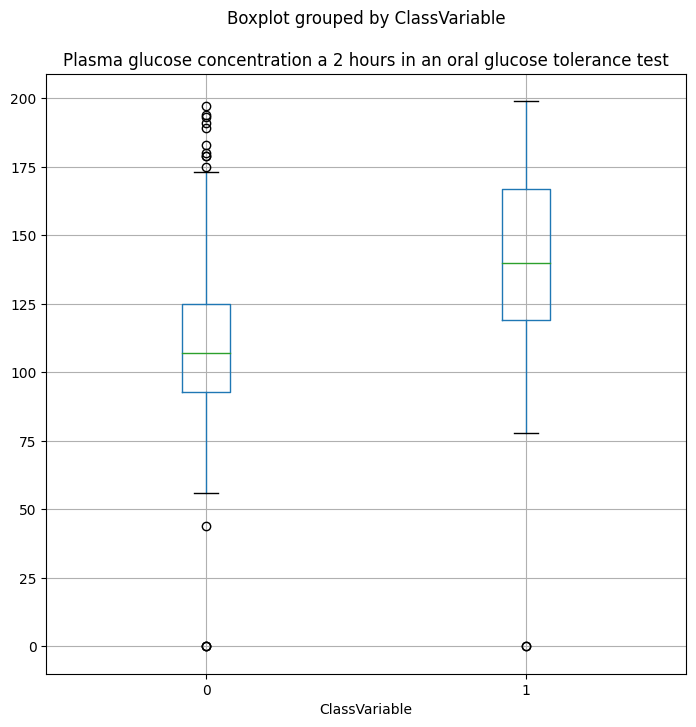

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('Plasma glucose concentration a 2 hours in an oral glucose tolerance test', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0].loc[(pima_indian_diabetes["Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] < 175 ) & (pima_indian_diabetes["Plasma glucose concentration a 2 hours in an oral glucose tolerance test"] >= 50)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0.0    486
1.0    268
Name: count, dtype: int64

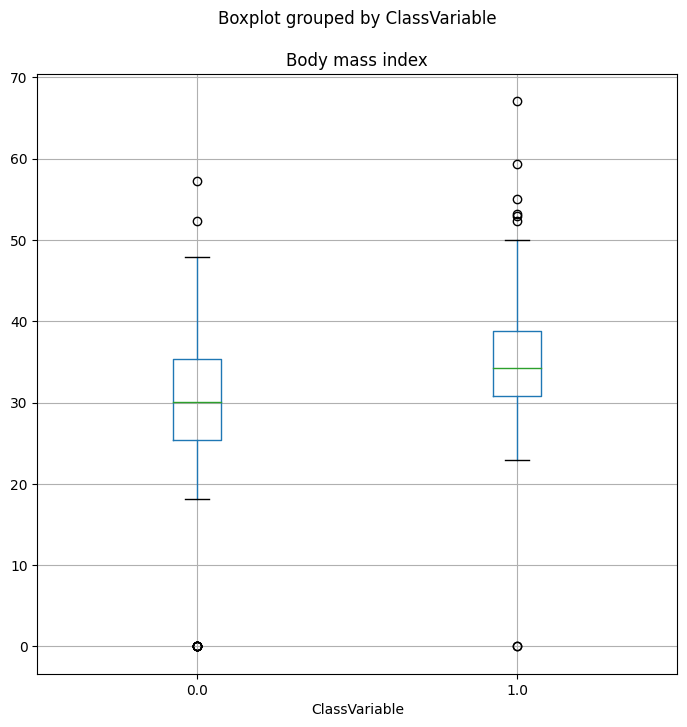

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('Body mass index', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 1].loc[(pima_indian_diabetes["Body mass index"] < 48 ) & (pima_indian_diabetes["Body mass index"] > 20)]

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0.0    486
1.0    254
Name: count, dtype: int64

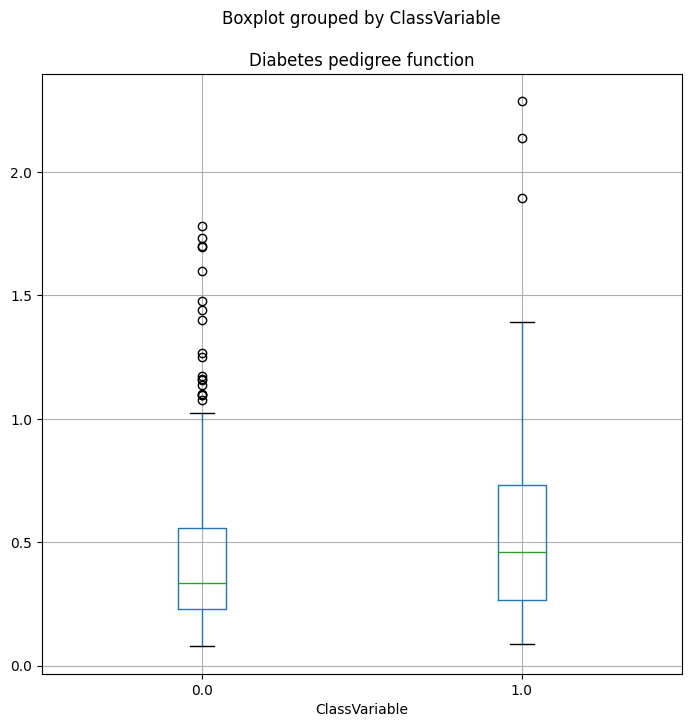

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('Diabetes pedigree function', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0].loc[(pima_indian_diabetes["Diabetes pedigree function"] < 1.05 ) & (pima_indian_diabetes["Diabetes pedigree function"] > 0)]

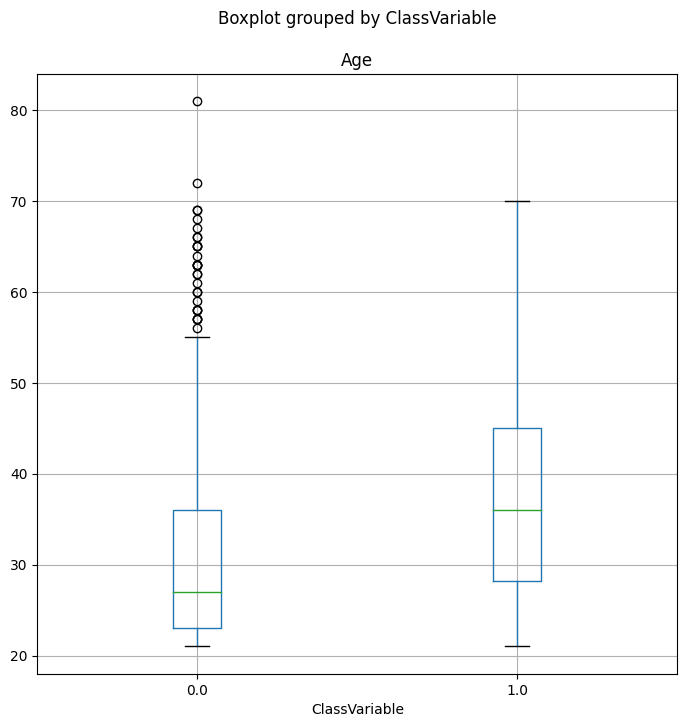

In [ ]:
fig , ax = subplots(figsize=(8, 8))
pima_indian_diabetes.boxplot('Age', by='ClassVariable', ax=ax);

In [ ]:
pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0] = pima_indian_diabetes.loc[pima_indian_diabetes.ClassVariable == 0].loc[(pima_indian_diabetes["Age"] < 55 ) & (pima_indian_diabetes["Age"] > 20)]

In [ ]:
pima_indian_diabetes.isna().sum()

Number of times pregnant                                                    78
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    78
Diastolic blood pressure (mm Hg)                                            78
Triceps skinfold thickness                                                  78
2-Hour serum insulin                                                        78
Body mass index                                                             78
Diabetes pedigree function                                                  78
Age                                                                         78
ClassVariable                                                               78
dtype: int64

Bu şekilde daha az veri çıkarılmış oldu

In [ ]:
pima_indian_diabetes.dropna(subset=["Age"], inplace=True)
pima_indian_diabetes.isna().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness                                                  0
2-Hour serum insulin                                                        0
Body mass index                                                             0
Diabetes pedigree function                                                  0
Age                                                                         0
ClassVariable                                                               0
dtype: int64

In [ ]:
pima_indian_diabetes.ClassVariable.value_counts()

ClassVariable
0.0    436
1.0    254
Name: count, dtype: int64

In [ ]:
pima_indian_diabetes_opt = pima_indian_diabetes[["Plasma glucose concentration a 2 hours in an oral glucose tolerance test","Body mass index","Diabetes pedigree function","Age"]]
pima_indian_diabetes_opt.head()

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Body mass index,Diabetes pedigree function,Age
0,148.0,33.6,0.627,50.0
1,85.0,26.6,0.351,31.0
2,183.0,23.3,0.672,32.0
3,89.0,28.1,0.167,21.0
4,137.0,43.1,2.288,33.0


In [ ]:
scaler = MinMaxScaler()
pima_indian_diabetes_norm = scaler.fit_transform( pima_indian_diabetes_opt)

In [ ]:
feature_pima_indian_diabetes_norm = pd.DataFrame(
                                                 pima_indian_diabetes_norm,
                                                 columns=pima_indian_diabetes_opt.columns
)

In [ ]:
feature_pima_indian_diabetes_norm.head()

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Body mass index,Diabetes pedigree function,Age
0,0.743719,0.586387,0.248416,0.591837
1,0.427136,0.464223,0.123529,0.204082
2,0.919598,0.406632,0.268778,0.224490
3,0.447236,0.490401,0.040271,0.000000
4,0.688442,0.752182,1.000000,0.244898


In [ ]:
ClassVariable = pima_indian_diabetes.ClassVariable

In [ ]:
Pima_indian_diabetes_train, Pima_indian_diabetes_test, CV_train, CV_test = train_test_split(feature_pima_indian_diabetes_norm, ClassVariable, test_size = 0.3, random_state = 42)

6. Soru

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(Pima_indian_diabetes_train,CV_train)

GaussianNB()

In [ ]:
expected = CV_train

In [ ]:
predicted = model.predict(Pima_indian_diabetes_train)

In [ ]:
print(classification_report(expected,predicted ))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       296
         1.0       0.78      0.68      0.73       187

    accuracy                           0.80       483
   macro avg       0.80      0.78      0.78       483
weighted avg       0.80      0.80      0.80       483



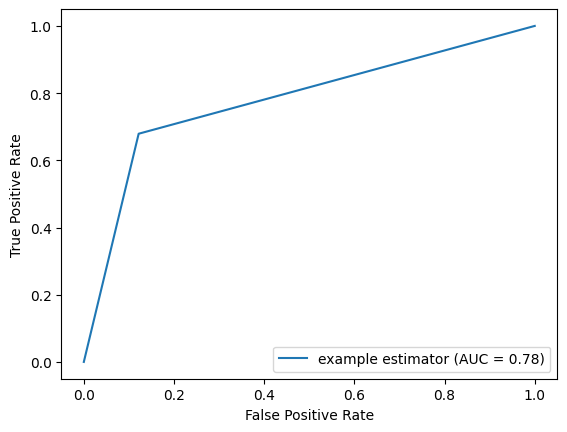

In [ ]:
#Roc curve oluşturup threshold hakkında bilgi sahibi olalım
fpr, tpr, thresholds = roc_curve(CV_train , predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [ ]:
naive_MSE = np.mean((CV_train - predicted)**2)
naive_MSE

0.19875776397515527

7. Soru

In [ ]:
error = []

# 1 ile 40 arasındaki komşuluk için hata hesaplanır
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Pima_indian_diabetes_train,CV_train)
    pred_i = knn.predict(Pima_indian_diabetes_test)
    error.append(np.mean(pred_i != CV_test))

Text(0, 0.5, 'Mean Error')

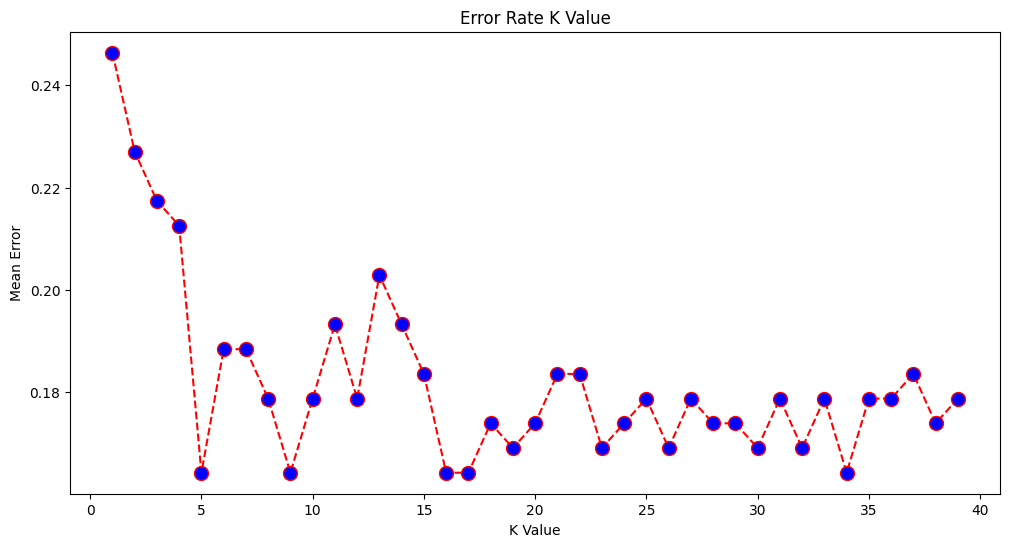

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
K = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(Pima_indian_diabetes_train,CV_train)

KNeighborsClassifier()

In [ ]:
predicted_knn = knn.predict(Pima_indian_diabetes_train)

In [ ]:
print(classification_report(expected,predicted_knn  ))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       296
         1.0       0.76      0.72      0.74       187

    accuracy                           0.80       483
   macro avg       0.79      0.79      0.79       483
weighted avg       0.80      0.80      0.80       483



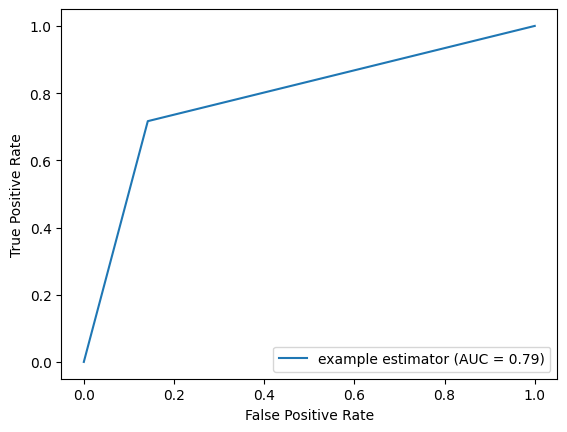

In [ ]:
#Roc curve oluşturup threshold hakkında bilgi sahibi olalım
fpr, tpr, thresholds = roc_curve(CV_train , predicted_knn)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [ ]:
knn1_MSE = np.mean((CV_train - predicted_knn)**2)
knn1_MSE

0.19668737060041408

In [ ]:
for i in range(1, 5):
  num_neighbors = i
  scores = evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors)
  mean_score = np.mean(scores)
  print(f"{i} komşuluk accuracy skoru= {mean_score}")

1 komşuluk accuracy skoru= 0.717391304347826
2 komşuluk accuracy skoru= 0.7188405797101449
3 komşuluk accuracy skoru= 0.7318840579710145
4 komşuluk accuracy skoru= 0.7434782608695653


KNeighborsClassifier algoritmasında 5 komşuluk kullanılmasıyla elde edilen sonucun, k_nearest_neighbors isimli cross-fold yöntemiyle oluşturulan algoritmadan daha başarılı sonuç döndüğü görülmüştür

8. Soru

In [ ]:
tf.random.set_seed(42)

# Create a model
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
model1.fit(Pima_indian_diabetes_train, CV_train, epochs=10)

Epoch 1/10
16/16 [==============================] - 2s 5ms/step - loss: 0.6630 - accuracy: 0.6294
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5591 - accuracy: 0.7143
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 0.4936 - accuracy: 0.7681
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5187 - accuracy: 0.7557
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.4643 - accuracy: 0.7805
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.7743
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8033
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7474
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7826
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7805


In [ ]:
model1_pred = model1.predict(Pima_indian_diabetes_train)

16/16 [==============================] - 0s 2ms/step


In [ ]:
model1_accuracy = accuracy_score(CV_train, tf.round(model1_pred)) * 100
model1_accuracy

79.08902691511386

In [ ]:
model1_results =  {"1h": 128,
                   "2h": 64,
                   "3h": 32,
                   "aktivasyon_fonksiyonu": "relu",
                   "learning_rate": 0.01,
                   "accuracy": model1_accuracy}

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

# Fit the model
model2.fit(Pima_indian_diabetes_train, CV_train, epochs=10)

Epoch 1/10
16/16 [==============================] - 2s 5ms/step - loss: 0.7061 - accuracy: 0.3872
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.3872
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.4638
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.6356
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.6936
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6789 - accuracy: 0.6957
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.7122
Epoch 8/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.7039
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.6998
Epoch 10/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.6957


In [ ]:
model2_pred = model2.predict(Pima_indian_diabetes_train)

16/16 [==============================] - 0s 2ms/step


In [ ]:
model2_accuracy = accuracy_score(CV_train, tf.round(model2_pred)) * 100
model2_accuracy

70.39337474120083

In [ ]:
model2_results =  {"1h": 128,
                   "2h": 64,
                   "3h": 32,
                   "aktivasyon_fonksiyonu": "relu",
                   "learning_rate": 0.0001,
                   "accuracy": model2_accuracy}

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation=tf.keras.activations.linear),
  tf.keras.layers.Dense(64, activation=tf.keras.activations.linear),
  tf.keras.layers.Dense(32, activation=tf.keras.activations.linear),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
model3.fit(Pima_indian_diabetes_train, CV_train, epochs=10)

Epoch 1/10
16/16 [==============================] - 1s 3ms/step - loss: 0.6811 - accuracy: 0.6108
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.7308
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7723
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7681
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7805
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7785
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7971
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7723
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7930
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7992


In [ ]:
model3_pred = model3.predict(Pima_indian_diabetes_train)

16/16 [==============================] - 0s 2ms/step


In [ ]:
model3_accuracy = accuracy_score(CV_train, tf.round(model3_pred)) * 100
model3_accuracy

79.08902691511386

In [ ]:
model3_results =  {"1h": 64,
                   "2h": 64,
                   "3h": 32,
                   "aktivasyon_fonksiyonu": "linear",
                   "learning_rate": 0.01,
                   "accuracy": model3_accuracy}

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(32, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(32, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
model4.fit(Pima_indian_diabetes_train, CV_train, epochs=10)

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 0.6678 - accuracy: 0.6398
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.7226
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7764
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7723
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7826
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.7909
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.8033
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7640
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7888
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7992


In [ ]:
model4_pred = model4.predict(Pima_indian_diabetes_train)

16/16 [==============================] - 0s 2ms/step


In [ ]:
model4_accuracy = accuracy_score(CV_train, tf.round(model4_pred)) * 100
model4_accuracy

79.29606625258799

In [ ]:
model4_results =  {"1h": 64,
                   "2h": 32,
                   "3h": 32,
                   "aktivasyon_fonksiyonu": "tanh",
                   "learning_rate": 0.01,
                   "accuracy": model4_accuracy}

In [ ]:
mlp_model_results = pd.DataFrame({"model1_results": model1_results,
                                  "model2_results": model2_results,
                                  "model3_results": model3_results,
                                  "model4_results": model4_results})
mlp_model_results = mlp_model_results.transpose()
mlp_model_results

,1h,2h,3h,aktivasyon_fonksiyonu,learning_rate,accuracy
model1_results,128,64,32,relu,0.01,79.089027
model2_results,128,64,32,relu,0.0001,70.393375
model3_results,64,64,32,linear,0.01,79.089027
model4_results,64,32,32,tanh,0.01,79.296066


In [ ]:
svm_model1 = SVC(kernel = "linear").fit(Pima_indian_diabetes_train, CV_train)

In [ ]:
svm_model1_pred = svm_model1.predict(Pima_indian_diabetes_train)

In [ ]:
svm_model1_accuracy = accuracy_score(CV_train, svm_model1_pred) * 100
svm_model1_accuracy

79.29606625258799

In [ ]:
svm_model1_results =  {"kernel" : "linear",
                       "Regularization parameter":1,
                       "accuracy": svm_model1_accuracy}

In [ ]:
svm_model2 = SVC(C=5, kernel = "linear").fit(Pima_indian_diabetes_train, CV_train)

In [ ]:
svm_model2_pred = svm_model2.predict(Pima_indian_diabetes_train)

In [ ]:
svm_model2_accuracy = accuracy_score(CV_train, svm_model2_pred) * 100
svm_model2_accuracy

78.67494824016563

In [ ]:
svm_model2_results =  {"kernel" : "linear",
                       "Regularization parameter":5,
                       "accuracy": svm_model2_accuracy}

In [ ]:
svm_model3 = SVC(C=10, kernel = "poly").fit(Pima_indian_diabetes_train, CV_train)

In [ ]:
svm_model3_pred = svm_model3.predict(Pima_indian_diabetes_train)

In [ ]:
svm_model3_accuracy = accuracy_score(CV_train, svm_model3_pred) * 100
svm_model3_accuracy

81.15942028985508

In [ ]:
svm_model3_results =  {"kernel" : "poly",
                       "Regularization parameter":10,
                       "accuracy": svm_model3_accuracy}

In [ ]:
svm_model4 = SVC(C=5, kernel = "rbf").fit(Pima_indian_diabetes_train, CV_train)

In [ ]:
svm_model4_pred = svm_model4.predict(Pima_indian_diabetes_train)

In [ ]:
svm_model4_accuracy = accuracy_score(CV_train, svm_model4_pred) * 100
svm_model4_accuracy

80.33126293995859

In [ ]:
svm_model4_results =  {"kernel" : "rbf",
                       "Regularization parameter":5,
                       "accuracy": svm_model4_accuracy}

In [ ]:
svm_model_results = pd.DataFrame({"svm_model1_results": svm_model1_results,
                                  "svm_model2_results": svm_model2_results,
                                  "svm_model3_results": svm_model3_results,
                                  "svm_model4_results": svm_model4_results})
svm_model_results = svm_model_results.transpose()
svm_model_results

,kernel,Regularization parameter,accuracy
svm_model1_results,linear,1,79.296066
svm_model2_results,linear,5,78.674948
svm_model3_results,poly,10,81.15942
svm_model4_results,rbf,5,80.331263


kernel'i poly olan 10 için regüle edilen svm modeli en başarılı modeldir